<a href="https://colab.research.google.com/github/sam-yak/Mini-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gatherin Data

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 3.18 ms (started: 2021-04-10 16:55:45 +00:00)


In [2]:
 !pip install bing-image-downloader

time: 3.24 s (started: 2021-04-10 16:55:50 +00:00)


In [3]:
!mkdir images

time: 121 ms (started: 2021-04-10 16:55:59 +00:00)


In [4]:
from bing_image_downloader import downloader 
downloader.download("pretty sunflower",limit=30,output_dir='images', adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/--ShcPhgDlI8/UfOJYMdoxMI/AAAAAAAAG_0/pkfkiw2YE88/s1600/beautiful+Sun+flower+(9).jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/236x/f2/67/7f/f2677f3cd3937fc574a7b2ecc8e9123f.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.wallpapers13.com/wp-content/uploads/2020/09/Sunflower-farm-field-yellow-flowers-beautiful-sunset--1680x1050.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/b2/85/6a/b2856aca0f0e83b3696fbb20726a8bc7--field-of-sunflowers-sunflower-fields.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.wallpapers13.com/wp-content/uploads/2015/12/High-definition-wallpapers-laptop-wallpaper-desktop-gallery-pansies-beautiful-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.wallpapers13.com/wp-content/uploads/2015/12/Lovely_white_rose_nature_popu

In [5]:
from bing_image_downloader import downloader 
downloader.download("rugby ball",limit=30,output_dir='images', 
                    adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/XfymJYn1BXc/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/Iry6iBcIors/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://bestinau.com.au/wp-content/uploads/2017/12/bigstock-Rugby-Ball-With-Rugby-Posts-173485916-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://passport.worldrugby.org/beginners_guide/images/sections/lineout-support.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/d8/2e/15/d82e15e5ec69bfe71a464945709e4493.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.wastehunter.com/wp-content/uploads/2014/08/diy-basketball-bag.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.globalblue.com/destinations/uk/london/article553492.ece/BINARY/Wembley-Stadium-05.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http

In [6]:
from bing_image_downloader import downloader 
downloader.download("ice cream cone",limit=30,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cliparting.com/wp-content/uploads/2016/08/Ice-cream-cone-ice-creamne-clip-art-web-clipart.png
[%] File Downloaded !

[%] Downloading Image #2 from https://static.mothership.sg/1/2020/10/img_chocolate_cone.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.diyhowto.org/wp-content/uploads/2019/05/DIYHowto-Crochet-Drawstring-Bags-Free-Patterns-06.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/66/d1/3a/66d13ae831b5f1ecfa24b189fa5a21ef--ice-cream-cone-cake-ice-cream-cakes.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Crystalcaveformations01.jpg/1200px-Crystalcaveformations01.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://nolisoli.ph/wp-content/uploads/2018/04/EASY-NO-CHURN-Vegan-Chocolate-Ice-Cream-5-ingredients-and-NATURALLY-sweetened-with-dates-vegan-gluten

In [12]:
#Preprocessing
# 1. Resize
# 2. Flatten
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target= []
images= []
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['pretty sunflower', 'rugby ball', 'ice cream cone']

for category in CATEGORIES:
  class_num= CATEGORIES.index(category) #Label Encoding 
  path= os.path.join(DATADIR,category)  #create path to use all images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) #normalizes values from 0 to 1
    flat_data.append(img_resized.flatten())
    target.append(class_num)

flat_data= np.array(flat_data)
target= np.array(target)
images= np.array(images)
     


time: 44.1 s (started: 2021-04-10 18:23:47 +00:00)


In [14]:
len(flat_data[0])

67500

time: 5.51 ms (started: 2021-04-10 18:25:53 +00:00)


<BarContainer object of 3 artists>

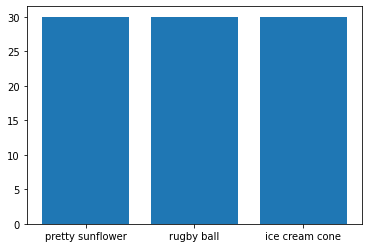

time: 180 ms (started: 2021-04-10 18:28:31 +00:00)


In [17]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [18]:
#split data into training and testing  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


time: 27.1 ms (started: 2021-04-10 18:37:06 +00:00)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 44s (started: 2021-04-10 18:55:10 +00:00)


In [29]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 0, 1])

time: 147 ms (started: 2021-04-10 19:00:15 +00:00)


In [30]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 11.9 ms (started: 2021-04-10 19:00:38 +00:00)


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.1 ms (started: 2021-04-10 19:01:53 +00:00)


In [33]:
accuracy_score(y_pred,y_test)

0.8148148148148148

time: 5.8 ms (started: 2021-04-10 19:03:40 +00:00)


In [35]:
confusion_matrix(y_pred,y_test)

array([[ 5,  0,  1],
       [ 0, 11,  1],
       [ 3,  0,  6]])

time: 6.5 ms (started: 2021-04-10 19:04:13 +00:00)


In [36]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

time: 43.4 ms (started: 2021-04-10 19:07:41 +00:00)


In [38]:
model= pickle.load(open('img_model.p', 'rb'))

time: 33.8 ms (started: 2021-04-10 19:10:10 +00:00)


Enter your URLhttps://i.pinimg.com/736x/3f/f0/1d/3ff01d5b9f1f16e92197140a31c5345e.jpg
(1136, 640, 3)
PREDICTED OUTPUT:pretty sunflower


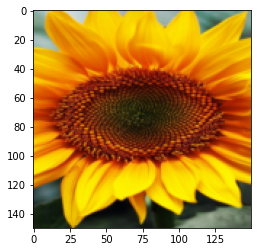

time: 32.8 s (started: 2021-04-10 19:23:41 +00:00)


In [47]:
# Testing a brand new image
flat_data=[]
url= input('Enter your URL')
img= imread(url)
img_resized= resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out= CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')